# Shallow model explainability with SHAP values

In [9]:
# import torch
import numpy as np
import pandas as pd
# import shap
import h5py
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
from brain_age_prediction import models, utils
importlib.reload(utils)

<module 'brain_age_prediction.utils' from '/home/laurar/brain_age_1D-CNN/src/brain_age_prediction/utils.py'>

In [5]:
# paths to best model checkpoints
shallow_model_path = 'lightweight-brain-age-prediction/umd5tlvz/checkpoints/epoch=57-step=13108.ckpt'
# paths to saved predictions
save_dir = '/ritter/share/projects/laura_riedel_thesis/shap_values.hdf5'

# get brain area / network names
network_names = utils.get_network_names()

In [8]:
# load predictions
with h5py.File(save_dir, 'r') as f:
    shallow_shap = f['shallow']['full'][()]
print('Shape of SHAP values:', shallow_shap.shape)

# load shallow model
shallow_model = models.shallow1DCNN.load_from_checkpoint(shallow_model_path)
shallow_model.eval()

Shape of SHAP values: (5000, 100, 490)


Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.


shallow1DCNN(
  (loss): MSELoss()
  (encoder): Sequential(
    (0): Conv1d(100, 128, kernel_size=(9,), stride=(1,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(128, 128, kernel_size=(9,), stride=(1,))
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): AdaptiveAvgPool1d(output_size=1)
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=1, bias=True)
  )
)

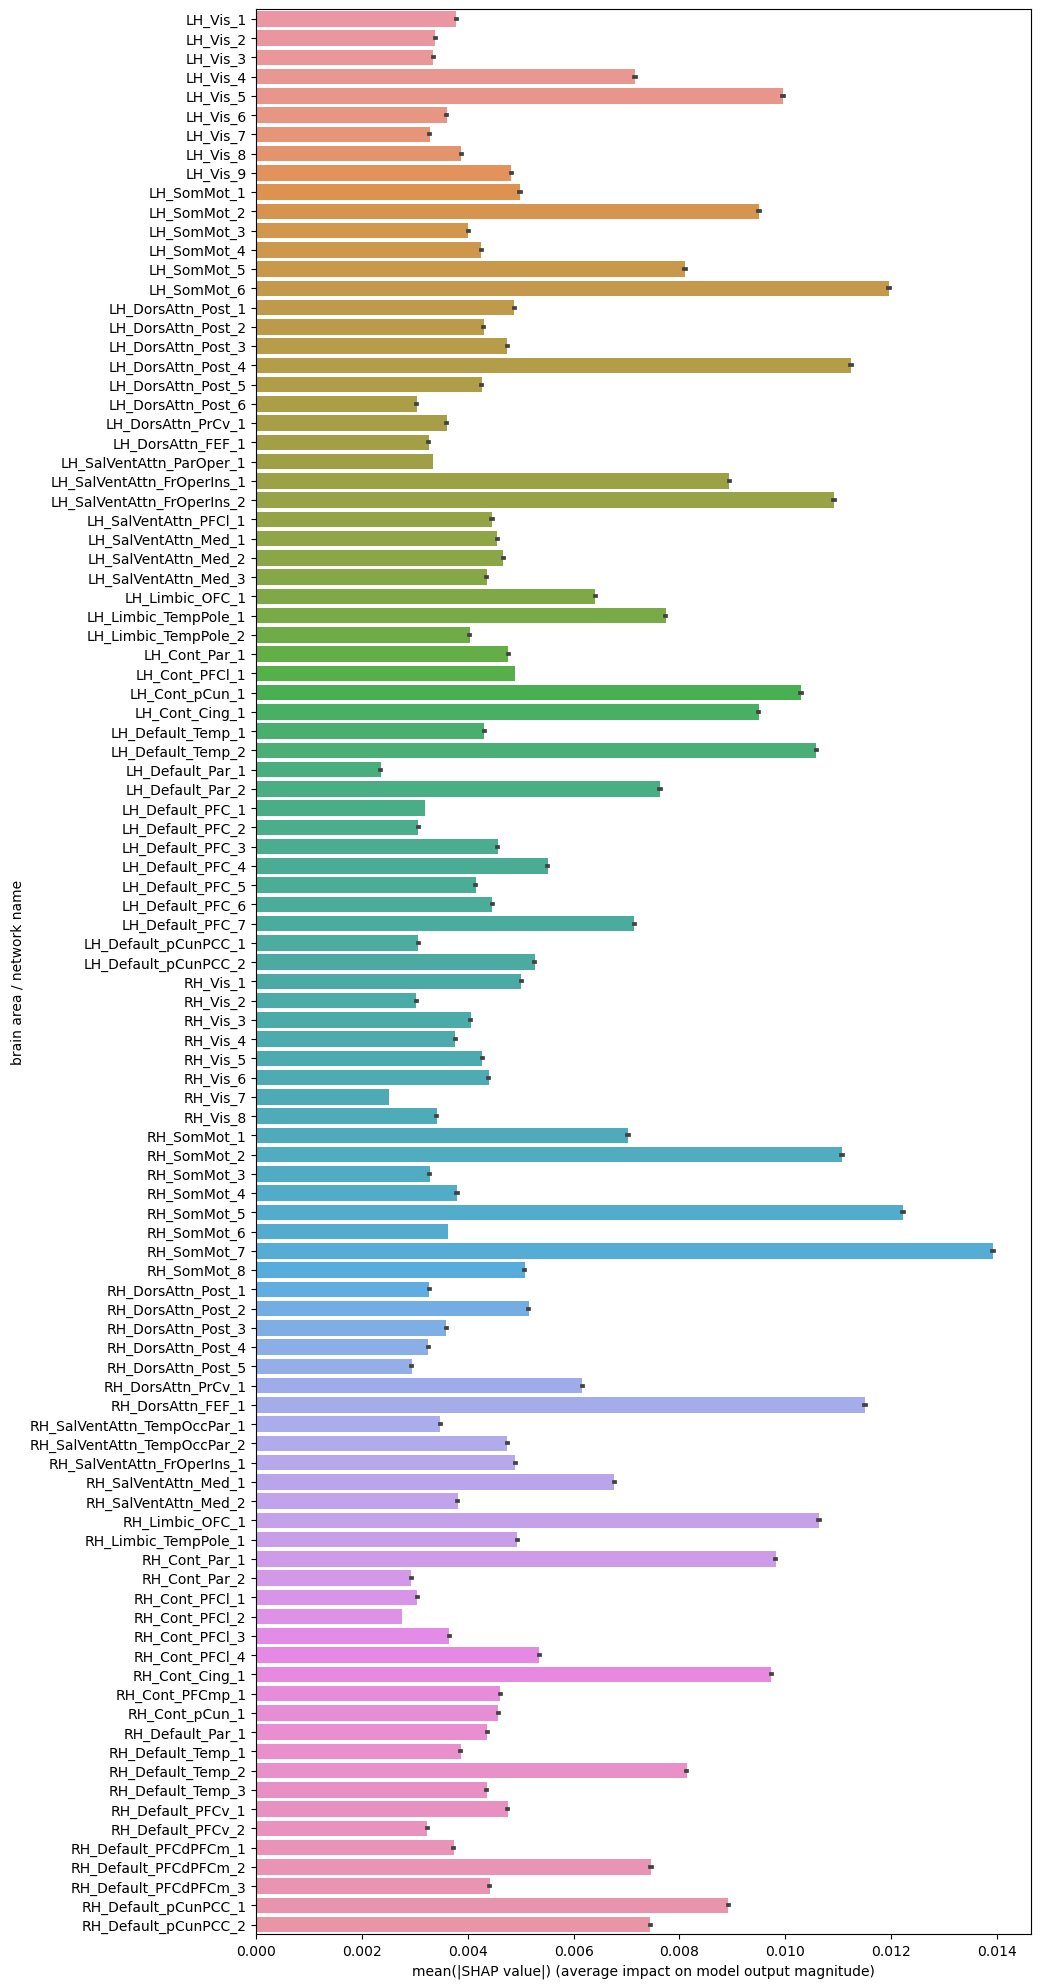

In [10]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=np.mean(np.abs(shallow_shap),axis=2),
            orient='h',
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (average impact on model output magnitude)',
       ylabel='brain area / network name',
       yticklabels=network_names)
plt.show()

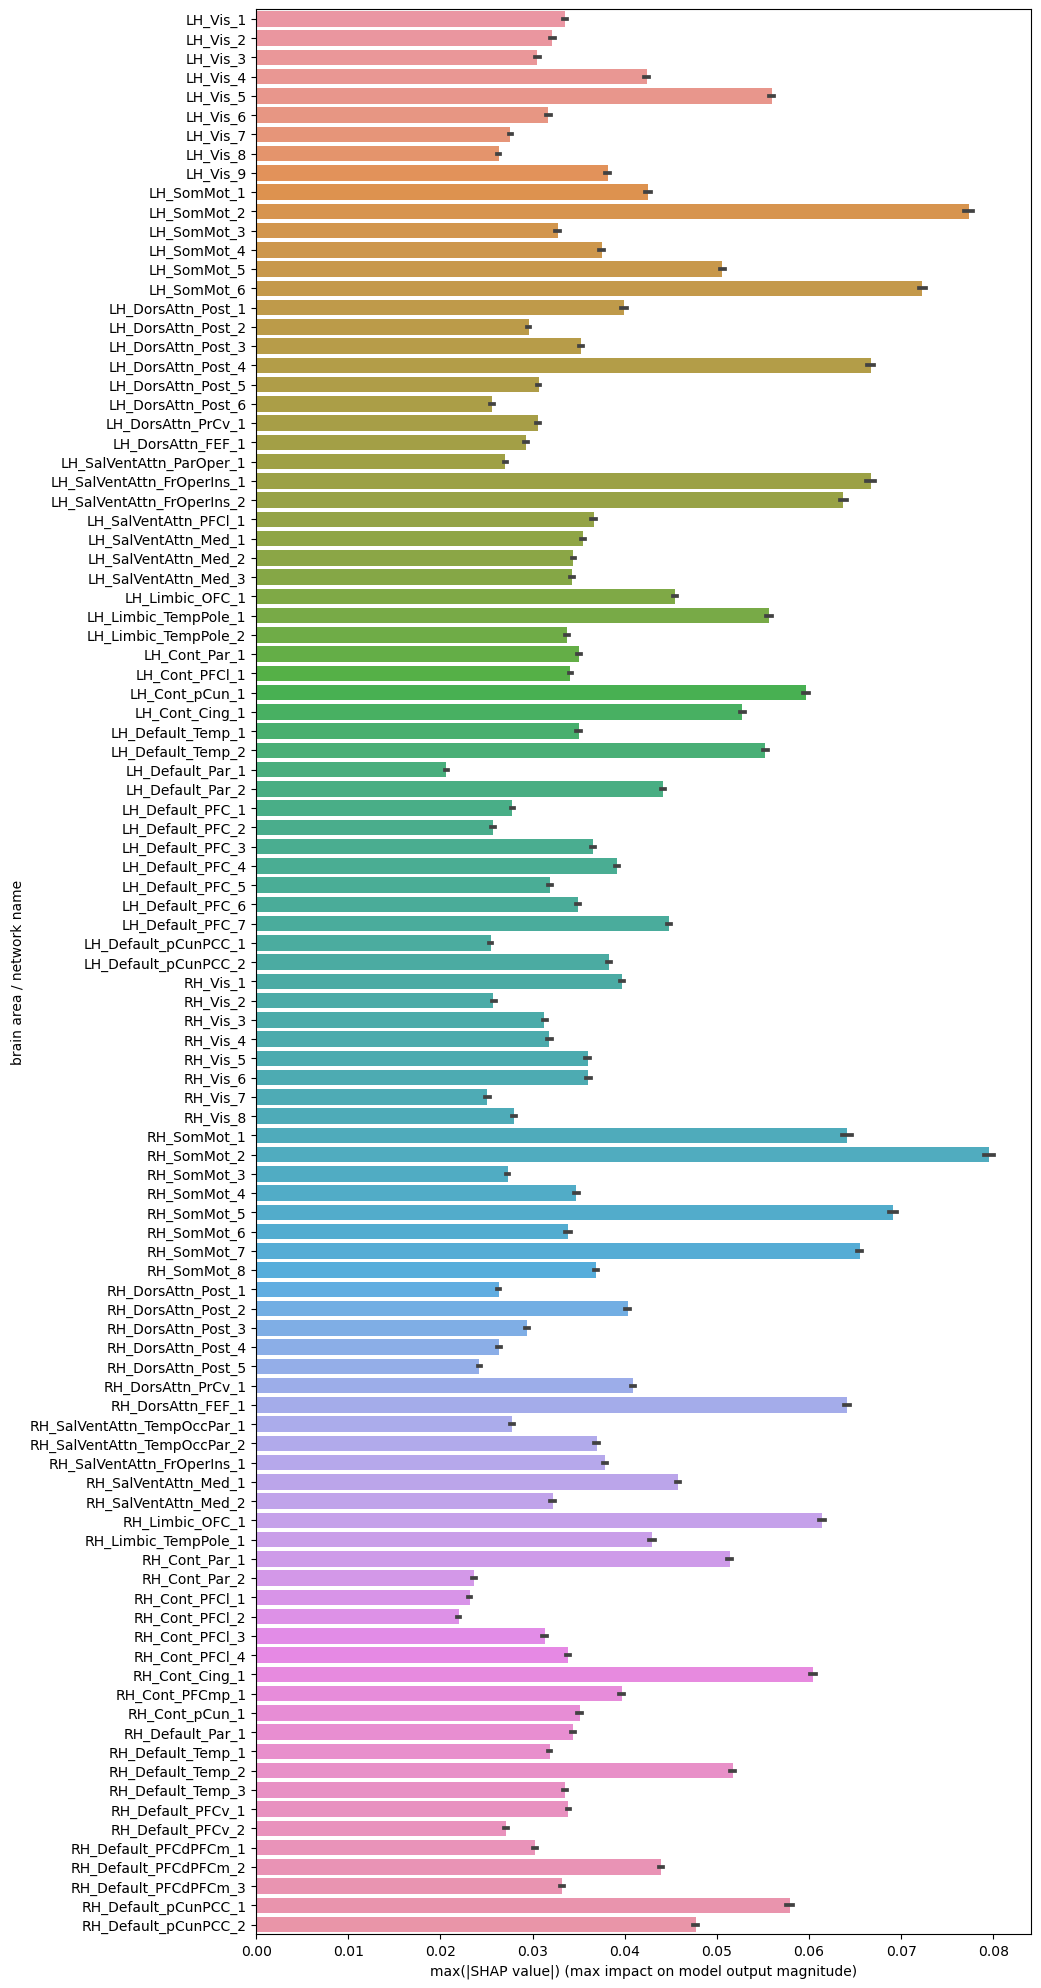

In [11]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=np.max(np.abs(shallow_shap),axis=2),
            orient='h',
            ax=ax)
ax.set(xlabel='max(|SHAP value|) (max impact on model output magnitude)',
       ylabel='brain area / network name',
       yticklabels=network_names)
plt.show()

Create dataframe to sort values according to their contribution

In [21]:
shallow_mean_area = np.mean(np.mean(np.abs(shallow_shap),axis=2),axis=0)
shallow_max_area = np.mean(np.max(np.abs(shallow_shap),axis=2),axis=0)

In [34]:
shallow_shap_df = pd.DataFrame(network_names, columns=['brain area'])
shallow_shap_df['mean SHAP'] = shallow_mean_area
shallow_shap_df['max SHAP'] = shallow_max_area
shallow_shap_df

,brain area,mean SHAP,max SHAP
0,LH_Vis_1,0.003781,0.033529
1,LH_Vis_2,0.003389,0.032147
2,LH_Vis_3,0.003351,0.030501
3,LH_Vis_4,0.007162,0.042370
4,LH_Vis_5,0.009952,0.055947
...,...,...,...
95,RH_Default_PFCdPFCm_1,0.003733,0.030242
96,RH_Default_PFCdPFCm_2,0.007464,0.043928
97,RH_Default_PFCdPFCm_3,0.004415,0.033205
98,RH_Default_pCunPCC_1,0.008924,0.057923


In [35]:
# 20 highest mean SHAP values
shallow_shap_df.sort_values(by=['mean SHAP'], ascending=False).head(20)

,brain area,mean SHAP,max SHAP
64,RH_SomMot_7,0.013933,0.065509
62,RH_SomMot_5,0.012231,0.069156
14,LH_SomMot_6,0.011965,0.072291
72,RH_DorsAttn_FEF_1,0.011509,0.064178
18,LH_DorsAttn_Post_4,0.011238,0.066714
59,RH_SomMot_2,0.011079,0.079549
25,LH_SalVentAttn_FrOperIns_2,0.010921,0.063697
78,RH_Limbic_OFC_1,0.010640,0.061396
38,LH_Default_Temp_2,0.010587,0.055274
35,LH_Cont_pCun_1,0.010302,0.059691


In [36]:
# 20 highest max SHAP values
shallow_shap_df.sort_values(by=['max SHAP'], ascending=False).head(20)

,brain area,mean SHAP,max SHAP
59,RH_SomMot_2,0.011079,0.079549
10,LH_SomMot_2,0.009503,0.077339
14,LH_SomMot_6,0.011965,0.072291
62,RH_SomMot_5,0.012231,0.069156
18,LH_DorsAttn_Post_4,0.011238,0.066714
24,LH_SalVentAttn_FrOperIns_1,0.008942,0.066681
64,RH_SomMot_7,0.013933,0.065509
72,RH_DorsAttn_FEF_1,0.011509,0.064178
58,RH_SomMot_1,0.007022,0.064109
25,LH_SalVentAttn_FrOperIns_2,0.010921,0.063697


In [37]:
shallow_shap_df.sort_values(by=['mean SHAP','max SHAP'], ascending=False).head(20)

,brain area,mean SHAP,max SHAP
64,RH_SomMot_7,0.013933,0.065509
62,RH_SomMot_5,0.012231,0.069156
14,LH_SomMot_6,0.011965,0.072291
72,RH_DorsAttn_FEF_1,0.011509,0.064178
18,LH_DorsAttn_Post_4,0.011238,0.066714
59,RH_SomMot_2,0.011079,0.079549
25,LH_SalVentAttn_FrOperIns_2,0.010921,0.063697
78,RH_Limbic_OFC_1,0.010640,0.061396
38,LH_Default_Temp_2,0.010587,0.055274
35,LH_Cont_pCun_1,0.010302,0.059691


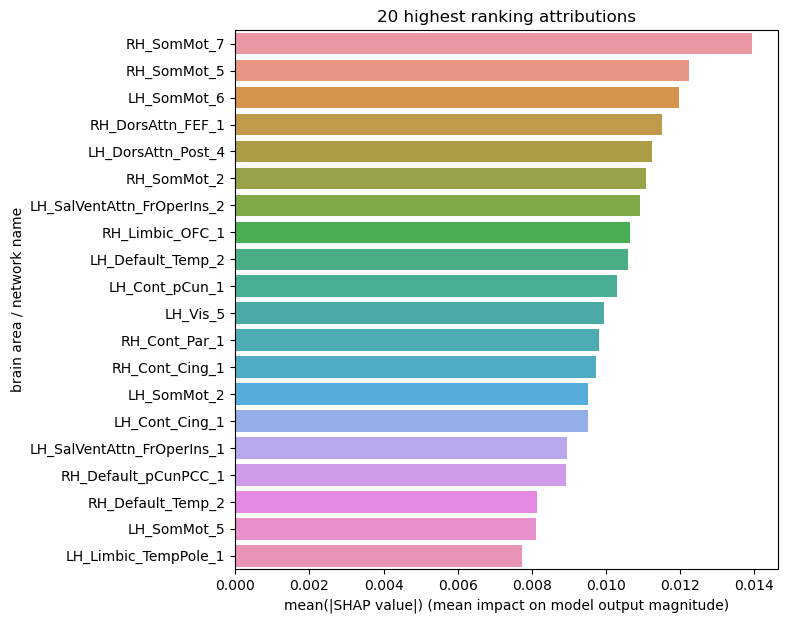

In [51]:
subset = shallow_shap_df.sort_values(by=['mean SHAP'], ascending=False)[:20].copy()
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(data=subset,
            x='mean SHAP',
            y='brain area',
            orient='h',
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (mean impact on model output magnitude)',
       ylabel='brain area / network name',
       title='20 highest ranking attributions')
plt.show()

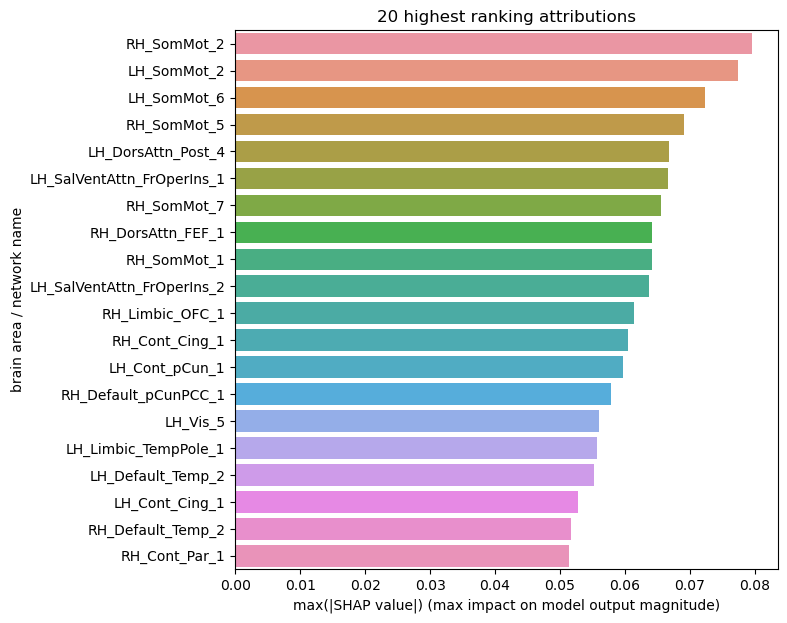

In [52]:
subset = shallow_shap_df.sort_values(by=['max SHAP'], ascending=False)[:20].copy()
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(data=subset,
            x='max SHAP',
            y='brain area',
            orient='h',
            ax=ax)
ax.set(xlabel='max(|SHAP value|) (max impact on model output magnitude)',
       ylabel='brain area / network name',
       title='20 highest ranking attributions')
plt.show()

In [15]:
np.mean(np.mean(np.abs(shallow_shap),axis=2),axis=0).shape

(100,)

In [16]:
np.mean(np.mean(np.abs(shallow_shap),axis=2),axis=0)

array([0.00378098, 0.00338881, 0.00335068, 0.00716164, 0.0099523 ,
       0.00360521, 0.0032834 , 0.00387639, 0.00482554, 0.00498688,
       0.00950316, 0.0040074 , 0.0042552 , 0.00810722, 0.01196522,
       0.00488118, 0.00430106, 0.00474739, 0.01123805, 0.00425964,
       0.00303296, 0.0036043 , 0.00326046, 0.0033419 , 0.00894233,
       0.01092112, 0.00445859, 0.00455939, 0.00467282, 0.00436227,
       0.00641159, 0.00774186, 0.00403523, 0.00476795, 0.00489325,
       0.01030171, 0.00950042, 0.00431562, 0.01058726, 0.00235119,
       0.00763391, 0.0031907 , 0.00306328, 0.00456283, 0.0055161 ,
       0.00415217, 0.0044585 , 0.00714409, 0.00306132, 0.00526352,
       0.00500791, 0.00303046, 0.00405619, 0.00375982, 0.00427301,
       0.00440011, 0.00251243, 0.00341304, 0.00702229, 0.01107911,
       0.00328025, 0.00379343, 0.01223143, 0.00362636, 0.01393337,
       0.00507546, 0.00327273, 0.005152  , 0.0035902 , 0.0032536 ,
       0.00293708, 0.0061644 , 0.01150895, 0.00347832, 0.00474

In [20]:
np.mean(np.max(np.abs(shallow_shap),axis=2),axis=0)

array([0.0335294 , 0.03214726, 0.03050066, 0.04236974, 0.05594661,
       0.0317195 , 0.02758389, 0.02633473, 0.03813897, 0.04253282,
       0.07733912, 0.03270874, 0.0375264 , 0.05059173, 0.07229108,
       0.03993138, 0.02957979, 0.03526438, 0.06671429, 0.03065157,
       0.02558935, 0.03057587, 0.02925482, 0.0270542 , 0.06668089,
       0.0636969 , 0.03663887, 0.0355107 , 0.03442871, 0.0342509 ,
       0.04546347, 0.05568891, 0.03377384, 0.03503671, 0.03411362,
       0.05969093, 0.05275761, 0.03500426, 0.05527403, 0.02062895,
       0.04417817, 0.02780359, 0.02571049, 0.03654894, 0.03916941,
       0.03187896, 0.03493617, 0.04481199, 0.02543901, 0.03826463,
       0.03968176, 0.02575586, 0.03129329, 0.03183471, 0.0359731 ,
       0.03605268, 0.02507668, 0.02797319, 0.06410934, 0.07954895,
       0.0272891 , 0.03476134, 0.06915624, 0.03383172, 0.06550925,
       0.036882  , 0.02631615, 0.0403566 , 0.02939976, 0.02636946,
       0.02420794, 0.040912  , 0.06417759, 0.02775395, 0.03698